# Exploratory Data Analysis

## Libraries to Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import gc

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import image

Set filepaths for train/test/validation images.

In [2]:
train_dir = '/Users/arencarpenter/Desktop/Detecting_ALL_with_CNN/Data/training'
test_dir = '/Users/arencarpenter/Desktop/Detecting_ALL_with_CNN/Data/testing'
val_dir = '/Users/arencarpenter/Desktop/Detecting_ALL_with_CNN/Data/validation'

Create lists for normal and ALL images pulled from the respective directories.

In [3]:
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/normal')]
all_imgs = [fn for fn in os.listdir(f'{train_dir}/all')]

select_normal = np.random.choice(normal_imgs, 3, replace = False)
select_all = np.random.choice(all_imgs, 3, replace = False)

Plot random images from each class.

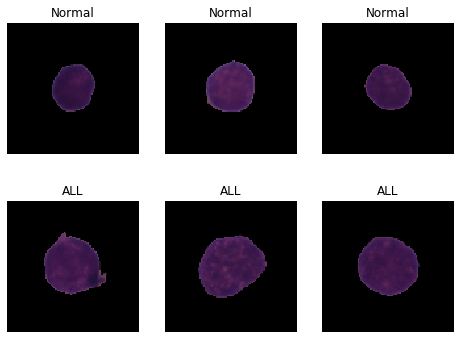

In [4]:
fig = plt.figure(figsize = (8,6))

for i in range(6):
    if i < 3:
        fp = f'{train_dir}/normal/{select_normal[i]}'
        label = 'Normal'
    else:
        fp = f'{train_dir}/all/{select_all[i-3]}'
        label = 'ALL'
    ax = fig.add_subplot(2, 3, i+1)
    fn = image.load_img(fp, target_size = (100,100),
                        color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

Use length of class lists to plot original dataset class imbalance.

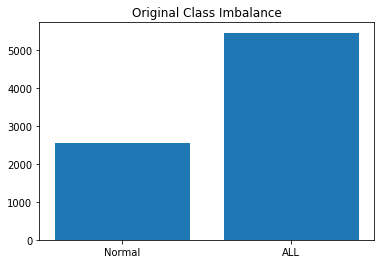

In [5]:
plt.bar(['Normal', 'ALL'], [len(normal_imgs), len(all_imgs)])
plt.title('Original Class Imbalance')
plt.show()

Visualize downsampled class imbalance. Final split was 0.57/0.43.

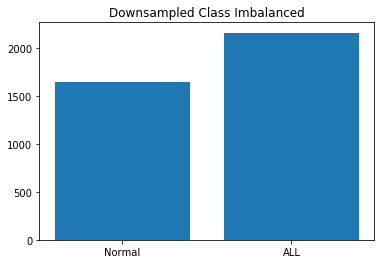

In [6]:
plt.bar(['Normal', 'ALL'], [1642, 2156])
plt.title('Downsampled Class Imbalanced')
plt.show()

Create function to process images to NumPy arrays to create Mean Images.

In [7]:
def img2np(pwd, fn_list, size = (32, 32)):
    for fn in fn_list:
        fp = pwd + fn
        current_image = image.load_img(fp, 
                                       target_size = size, 
                                       color_mode = 'grayscale')
        img_ts = image.img_to_array(current_image)
        img_ts = [img_ts.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            full_mat = img_ts
    return full_mat

In [8]:
normal_images = img2np(f'{train_dir}/normal/', normal_imgs)
all_images = img2np(f'{train_dir}/all/', all_imgs)

Just select 25 images to make comparison cleaner.

In [9]:
normal_images = normal_images[:25]
all_images = all_images[:25]

Create function to plot Mean Images.

In [10]:
def find_mean_img(image_vecs, title, size = (32,32)):
    mean_img = np.mean(image_vecs, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

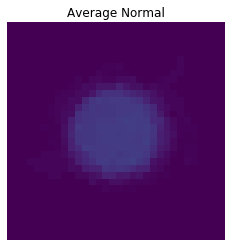

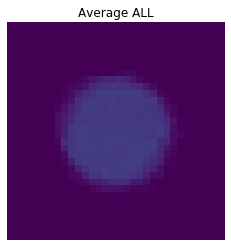

In [11]:
norm_mean = find_mean_img(normal_images, 'Normal')
pneu_mean = find_mean_img(all_images, 'ALL')

The diversity of cell interiors is such that mean images can't detect differences between the classes, however we can clearly see that ALL cells are much larger than normal cells. This makes sense as ALL cells have unregulated cell growth and would thus be larger.